### Principal Component Analysis
* Unsupervised algo
* Used for dimentionality reduction

In [3]:
from sklearn.datasets import fetch_mldata

In [ ]:
mnist = fetch_mldata('MNIST original', data_home='.')

In [6]:
mnist.data.shape

(70000, 784)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

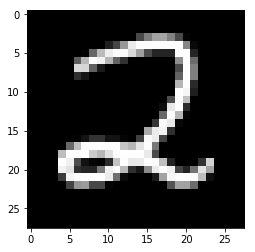

In [14]:
plt.imshow(mnist.data[18000].reshape(28,28), cmap='gray')

In [15]:
from sklearn.decomposition import PCA

In [16]:
from sklearn.datasets import load_iris

In [17]:
iris = load_iris()

In [19]:
pca = PCA(n_components=2)

In [32]:
X_pca = pca.fit_transform(iris.data)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
trainX,testX, trainY, testY = train_test_split(X_pca,iris.target)

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
lr.score(testX,testY)

0.86842105263157898

In [39]:
trainX,testX, trainY, testY = train_test_split(iris.data,iris.target)

In [40]:
lr.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
lr.score(testX,testY)

0.94736842105263153

In [42]:
mnist.data.shape

(70000, 784)

In [43]:
mnist.target.shape

(70000,)

In [44]:
X = mnist.data
y = mnist.target

In [45]:
pca = PCA(n_components=150)

In [47]:
from sklearn.feature_selection import SelectKBest

In [48]:
selection = SelectKBest(k=30)

In [49]:
from sklearn.pipeline import Pipeline,FeatureUnion

In [50]:
combined_features = FeatureUnion([('pca',pca),('select',selection)])

In [51]:
X_features = combined_features.fit(X,y).transform(X)

C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  52  53  54  55  56  57  82  83
  84  85 111 112 140 168 476 560 644 671 672 673 699 700 701 727 728 729
 730 754 755 756 757 758 759 780 781 782 783] are constant.
  UserWarning)
C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [52]:
lr = LogisticRegression()

In [53]:
pipeline = Pipeline([('features', combined_features), ('lr', LogisticRegression())])

In [ ]:
pipeline.fit(X,y)

C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  52  53  54  55  56  57  82  83
  84  85 111 112 140 168 476 560 644 671 672 673 699 700 701 727 728 729
 730 754 755 756 757 758 759 780 781 782 783] are constant.
  UserWarning)
C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
